In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

import sys
import os
# Current working directory in Jupyter Notebook
project_root = os.getcwd()  # Current working directory
project_root = os.path.join(project_root, '..')  # Move one level up to the root
sys.path.append(project_root)
# from importlib import reload
# import utils.custom
# reload(utils.custom)
from utils.custom import calculate_metrics, plot_returns
from definitions.constants_V import DIFF_REBALANCING_STOCK_DICT_ALL_PKL_V, DIFF_REBALANCING_RETURNS_ALL_PKL_V, DATE_GS_CUTOFF #DIFF_REBALANCING_COMBINED_DATA_CSV


# dfsfilename=DIFF_REBALANCING_COMBINED_DATA_ALL_CSV
# dfsfilename=dfsfilename
# picasodfs=pd.read_pickle(dfsfilename)

stock_dict_filename=DIFF_REBALANCING_STOCK_DICT_ALL_PKL_V
stock_dict_filename=stock_dict_filename
stks=pd.read_pickle(stock_dict_filename)

rets_filename=DIFF_REBALANCING_RETURNS_ALL_PKL_V
rets_filename=rets_filename
retss=pd.read_pickle(rets_filename)


In [15]:
# picasodfs[0]

In [16]:
retss[0]

,returns
t,
2007-01-31,0.000000
2007-02-28,0.000000
2007-03-30,0.000000
2007-04-30,0.000000
2007-05-31,3.308661
...,...
2024-10-31,0.000000
2024-11-29,0.000000
2024-12-31,0.000000


In [17]:
stks[0]

{'2007-01-31': array([], dtype=float64),
 '2007-02-28': array([], dtype=float64),
 '2007-03-30': array([], dtype=float64),
 '2007-04-30': array([], dtype=float64),
 '2007-05-31': array(['GOOG', 'GE', 'AAPL'], dtype=object),
 '2007-06-29': array([], dtype=float64),
 '2007-07-31': array([], dtype=float64),
 '2007-08-31': array([], dtype=float64),
 '2007-09-28': array(['CSCO', 'INTC', 'OIH'], dtype=object),
 '2007-10-31': array([], dtype=float64),
 '2007-11-30': array(['MSFT', 'DBC', 'GSG'], dtype=object),
 '2007-12-31': array([], dtype=float64),
 '2008-01-31': array(['VNQ', 'MSFT', 'DBA'], dtype=object),
 '2008-02-29': array(['VNQ', 'GSG', 'DBC'], dtype=object),
 '2008-03-31': array(['GS', 'VNQ', 'GE'], dtype=object),
 '2008-04-30': array([], dtype=float64),
 '2008-05-30': array(['GOOG', 'GS', 'VNQ'], dtype=object),
 '2008-06-30': array(['GOOG', 'GS', 'OIH'], dtype=object),
 '2008-07-31': array([], dtype=float64),
 '2008-08-29': array(['GS', 'VNQ', 'XLE'], dtype=object),
 '2008-09-30': a

In [18]:
# Initialize lists to store metrics
annual_returns = []
sharpe_ratios = []
max_drawdowns = []
calmar_ratios = []
sortino_ratios = []

for number in range(18):
    print(f"*******************{number}************************")
    annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=retss[number])#[(retss[number].index>'2009-01-01')]

    # Append metrics to their respective lists
    annual_returns.append(annual_return)
    sharpe_ratios.append(sharpe_ratio)
    max_drawdowns.append(max_drawdown_value)
    calmar_ratios.append(calmar_ratio)
    sortino_ratios.append(sortino_ratio)

    # Print results
    print(f"Annual Return: {annual_return * 100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
    print(f"Calmar Ratio: {calmar_ratio:.2f}")
    print(f"Sortino Ratio: {sortino_ratio:.2f}")

# Calculate averages
avg_annual_return = sum(annual_returns) / len(annual_returns)
avg_sharpe_ratio = sum(sharpe_ratios) / len(sharpe_ratios)
avg_max_drawdown = sum(max_drawdowns) / len(max_drawdowns)
avg_calmar_ratio = sum(calmar_ratios) / len(calmar_ratios)
avg_sortino_ratio = sum(sortino_ratios) / len(sortino_ratios)

# Print averages
print("\n********** Averages **********")
print(f"Average Annual Return: {avg_annual_return * 100:.2f}%")
print(f"Average Sharpe Ratio: {avg_sharpe_ratio:.2f}")
print(f"Average Max Drawdown: {avg_max_drawdown * 100:.2f}%")
print(f"Average Calmar Ratio: {avg_calmar_ratio:.2f}")
print(f"Average Sortino Ratio: {avg_sortino_ratio:.2f}")


*******************0************************
Annual Return: 18.11%
Sharpe Ratio: 0.73
Max Drawdown: 36.02%
Calmar Ratio: 0.50
Sortino Ratio: 1.19
*******************1************************
Annual Return: 13.08%
Sharpe Ratio: 0.77
Max Drawdown: 18.47%
Calmar Ratio: 0.71
Sortino Ratio: 0.78
*******************2************************
Annual Return: 10.12%
Sharpe Ratio: 0.65
Max Drawdown: 24.97%
Calmar Ratio: 0.41
Sortino Ratio: 0.32
*******************3************************
Annual Return: 9.61%
Sharpe Ratio: 0.58
Max Drawdown: 30.34%
Calmar Ratio: 0.32
Sortino Ratio: 0.32
*******************4************************
Annual Return: 8.67%
Sharpe Ratio: 0.65
Max Drawdown: 24.07%
Calmar Ratio: 0.36
Sortino Ratio: 0.36
*******************5************************
Annual Return: 11.70%
Sharpe Ratio: 0.74
Max Drawdown: 25.03%
Calmar Ratio: 0.47
Sortino Ratio: 0.42
*******************6************************
Annual Return: 15.13%
Sharpe Ratio: 0.71
Max Drawdown: 28.31%
Calmar Ratio: 0.53


In [19]:
# Initialize lists to store metrics
annual_returns = []
sharpe_ratios = []
max_drawdowns = []
calmar_ratios = []
sortino_ratios = []

for number in range(18):
    print(f"*******************{number}************************")
    annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=retss[number][(retss[number].index<=DATE_GS_CUTOFF)])#&(retss[number].index>'2009-01-01')

    # Append metrics to their respective lists
    annual_returns.append(annual_return)
    sharpe_ratios.append(sharpe_ratio)
    max_drawdowns.append(max_drawdown_value)
    calmar_ratios.append(calmar_ratio)
    sortino_ratios.append(sortino_ratio)

    # Print results
    print(f"Annual Return: {annual_return * 100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
    print(f"Calmar Ratio: {calmar_ratio:.2f}")
    print(f"Sortino Ratio: {sortino_ratio:.2f}")

# Calculate averages
avg_annual_return = sum(annual_returns) / len(annual_returns)
avg_sharpe_ratio = sum(sharpe_ratios) / len(sharpe_ratios)
avg_max_drawdown = sum(max_drawdowns) / len(max_drawdowns)
avg_calmar_ratio = sum(calmar_ratios) / len(calmar_ratios)
avg_sortino_ratio = sum(sortino_ratios) / len(sortino_ratios)

# Print averages
print("\n********** Averages **********")
print(f"Average Annual Return: {avg_annual_return * 100:.2f}%")
print(f"Average Sharpe Ratio: {avg_sharpe_ratio:.2f}")
print(f"Average Max Drawdown: {avg_max_drawdown * 100:.2f}%")
print(f"Average Calmar Ratio: {avg_calmar_ratio:.2f}")
print(f"Average Sortino Ratio: {avg_sortino_ratio:.2f}")


*******************0************************
Annual Return: 19.17%
Sharpe Ratio: 0.76
Max Drawdown: 36.02%
Calmar Ratio: 0.53
Sortino Ratio: 1.41
*******************1************************
Annual Return: 18.09%
Sharpe Ratio: 0.95
Max Drawdown: 10.16%
Calmar Ratio: 1.78
Sortino Ratio: 1.93
*******************2************************
Annual Return: 14.48%
Sharpe Ratio: 0.88
Max Drawdown: 24.96%
Calmar Ratio: 0.58
Sortino Ratio: 0.49
*******************3************************
Annual Return: 12.71%
Sharpe Ratio: 0.72
Max Drawdown: 30.34%
Calmar Ratio: 0.42
Sortino Ratio: 0.53
*******************4************************
Annual Return: 10.32%
Sharpe Ratio: 0.86
Max Drawdown: 10.80%
Calmar Ratio: 0.96
Sortino Ratio: 0.81
*******************5************************
Annual Return: 13.24%
Sharpe Ratio: 0.95
Max Drawdown: 11.61%
Calmar Ratio: 1.14
Sortino Ratio: 0.95
*******************6************************
Annual Return: 19.54%
Sharpe Ratio: 0.80
Max Drawdown: 10.28%
Calmar Ratio: 1.9

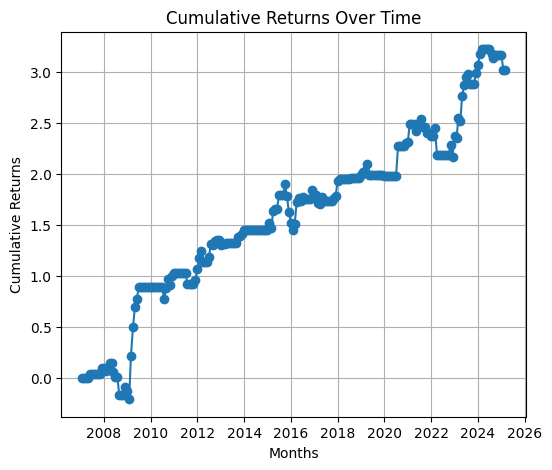

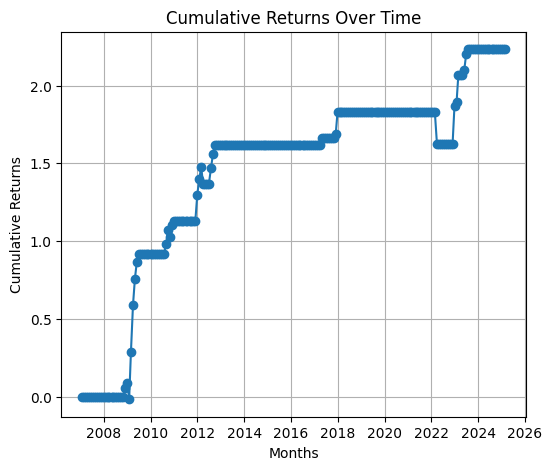

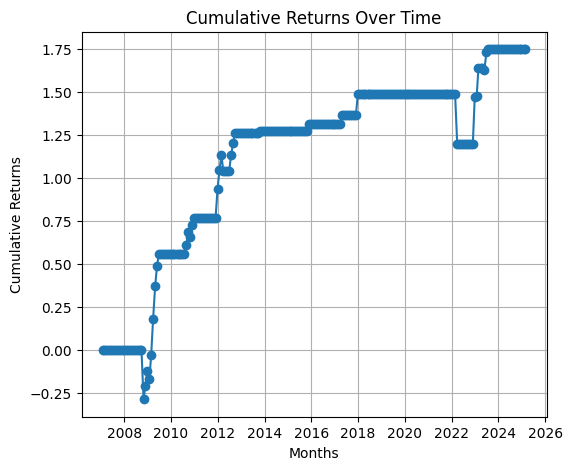

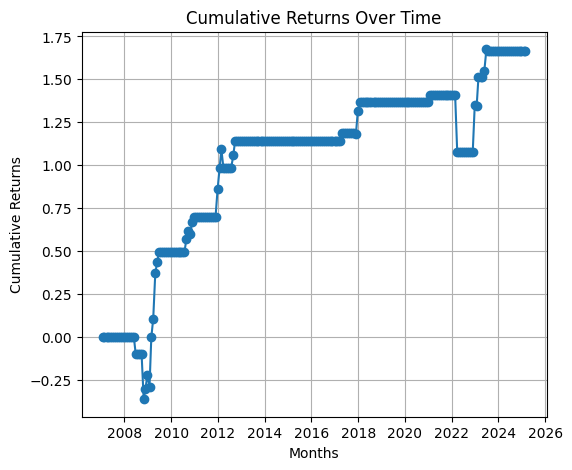

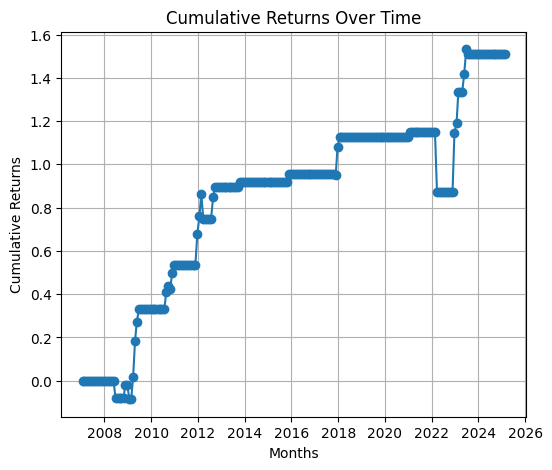

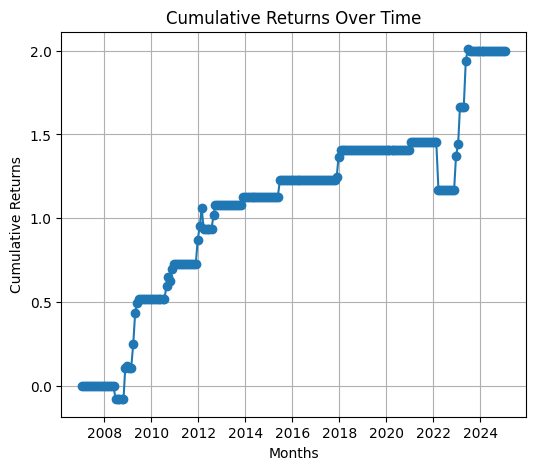

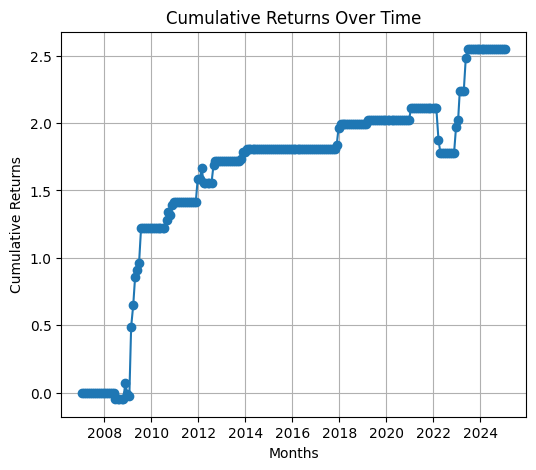

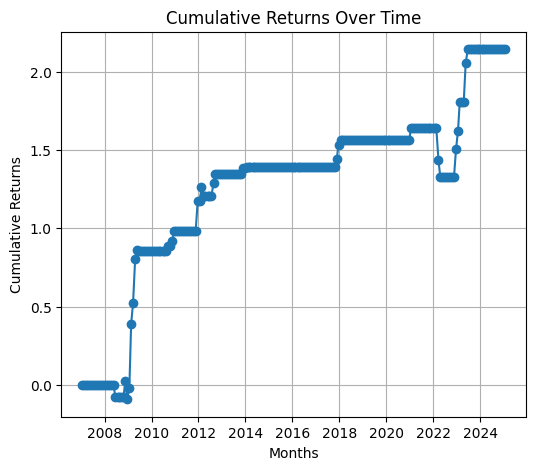

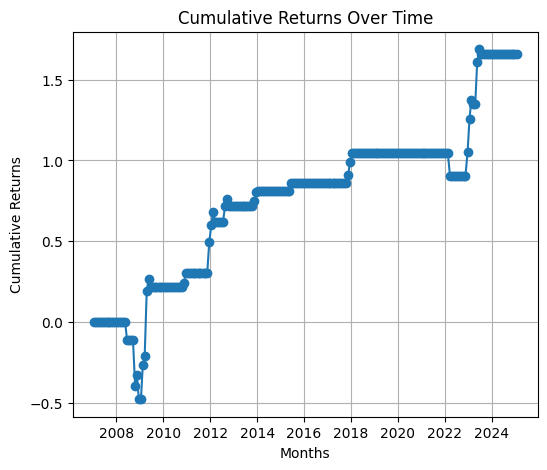

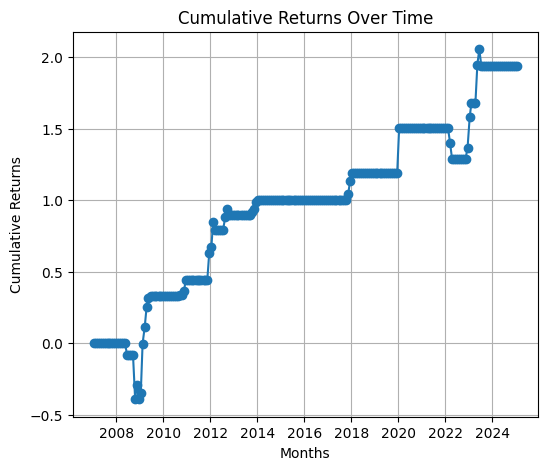

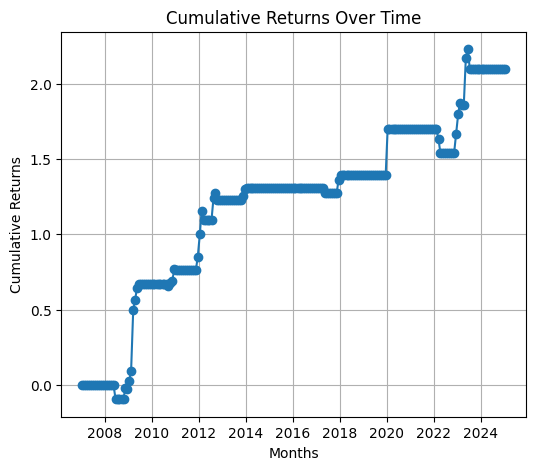

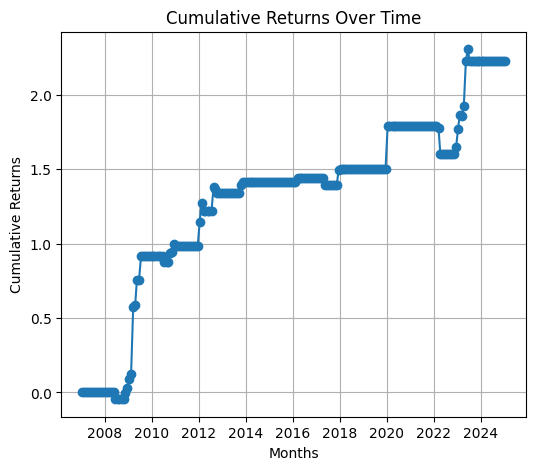

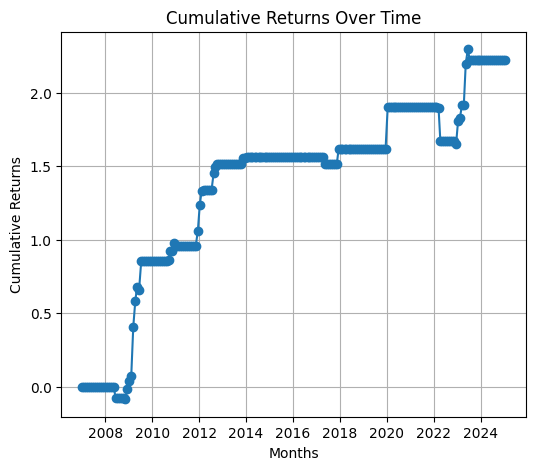

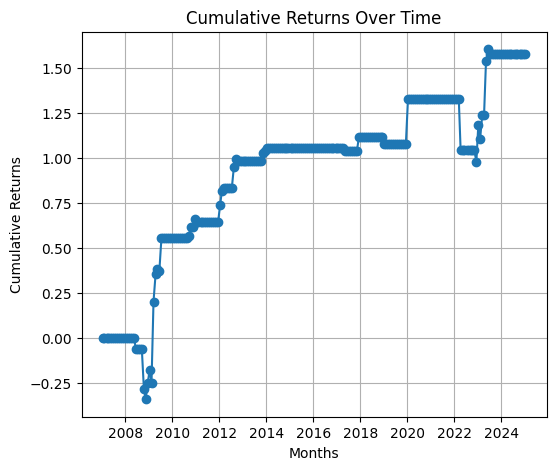

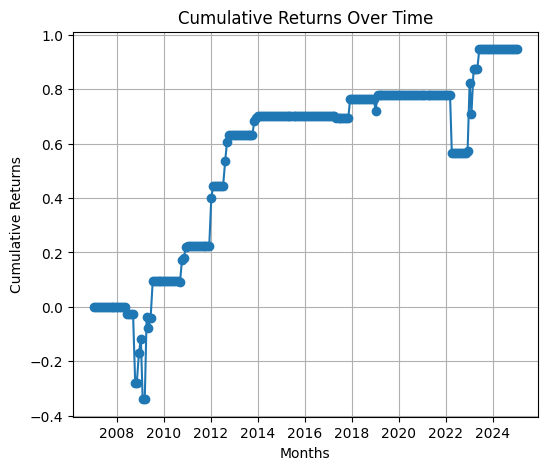

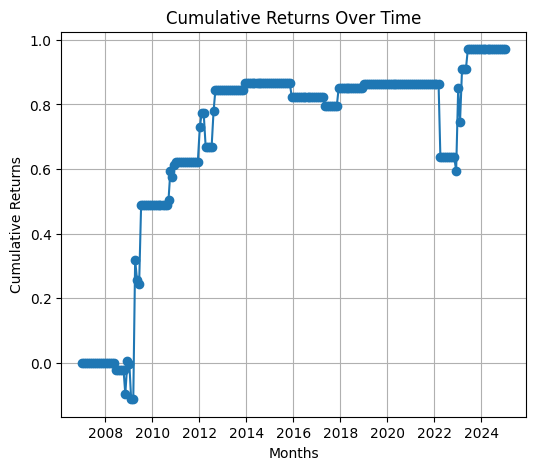

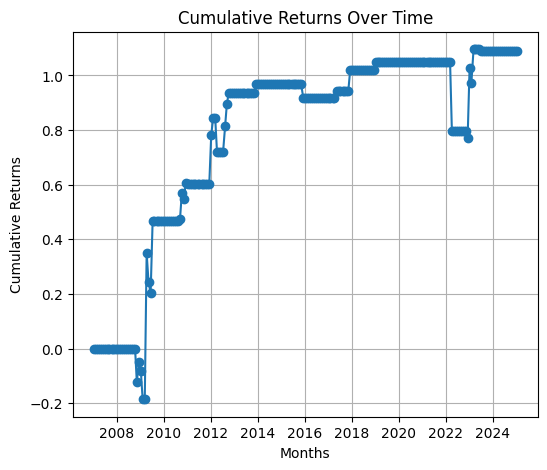

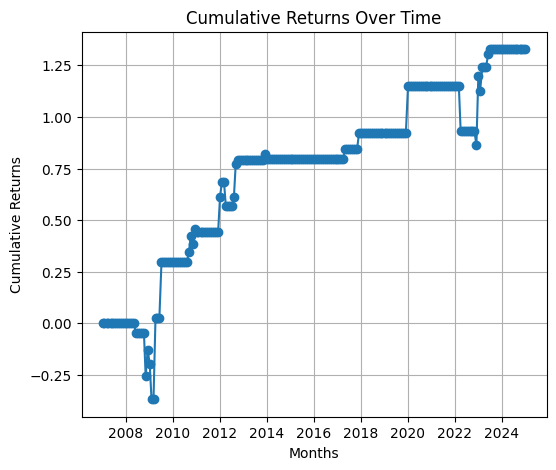

In [20]:
for number in range(18):
    plot_returns(returns=retss[number], diffRebal=True)